In [1]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2018_ber')

In [3]:
Daten.shape

(234, 356)

In [4]:
Daten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b22a_4,D-Q8b22a_5,D-Q8b22a_6,D-Q8b22a_7,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,porc_nan
0,2018-02-06 09:33:28,2018-02-06 09:39:02,1,0,100,333,1,2018-02-06 09:39:03,R_3QJg8ACLGHcD7MF,0,...,0,0,0,0,0,0,0,2,0,64.285714
1,2018-02-07 13:36:43,2018-02-07 13:50:01,0,83.47.61.251,100,797,1,2018-02-07 13:50:03,R_30ugRXCZSq8xMsk,0,...,0,0,0,0,0,0,0,2,0,59.523810
2,2018-02-08 02:38:26,2018-02-08 03:09:12,0,84.126.137.166,100,1845,1,2018-02-08 03:09:13,R_1eV2zm3mlcaUK2x,0,...,0,0,0,0,0,0,0,2,0,55.238095


Glossar erstellen = Datei aufrufen (in anderem Notebook erstellt + gespeichert)

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [6]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [7]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [8]:
get_name_glossind('A-Q1')

(17,
 'Probablemente, en este texto encuentre palabras o grupos de palabras que no conoce aún. Sin embargo, seguro que logra entender algunas de estas palabras nuevas sin ayuda, bien enseguida o después de pensar un poco. Lea el texto y piense qué hace para descubrir el significado o la función de las palabras que desconoce. También puede pensar en otras situaciones en las que se haya encontrado con vocabulario nuevo.  ¿Qué estrategias o técnicas usa para averiguar el significado de palabras desconocidas? ¿Qué características de las palabras, frases o textos le ayudan?               Apunte todas sus ideas aquí:')

In [9]:
Daten.loc[233]

StartDate                                              2018-04-13 07:15:45
EndDate                                                2018-04-13 07:23:22
Status                                                                   0
IPAddress                                                    77.228.150.99
Progress                                                                 7
Duration (in seconds)                                                  457
Finished                                                                 0
RecordedDate                                           2018-04-20 07:23:26
ResponseId                                               R_2YMvjpR472XS4gK
RecipientLastName                                                        0
RecipientFirstName                                                       0
RecipientEmail                                                           0
ExternalReference                                                        0
LocationLatitude         

In [10]:
FinishedA3 = Daten.drop([233])

In [11]:
Finished = FinishedA3.drop([230,231,232])

Liste erstellen:

In [12]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [13]:
Liste_A_Q3 = [col for col in FinishedA3.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_A-Q3_3_TEXT'

kann noch verbessert werden:

statt Spalte "3" (eigentlich 4, Python zählt ja ab 0) irgendwie "text"-Spalte weglassen

In [14]:
Liste_C_Q1 = [col for col in Finished.columns if 'C-Q1' in col]

In [15]:
def graf_hist(D,l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(D[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

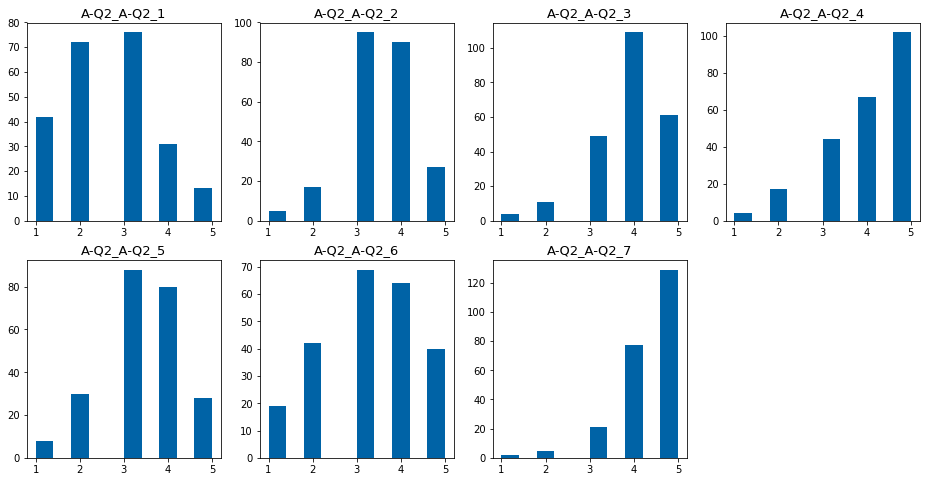

In [16]:
graf_hist(Daten,Liste_A_Q2,16,8,2,4)

In [17]:
len(Liste_A_Q3)

31

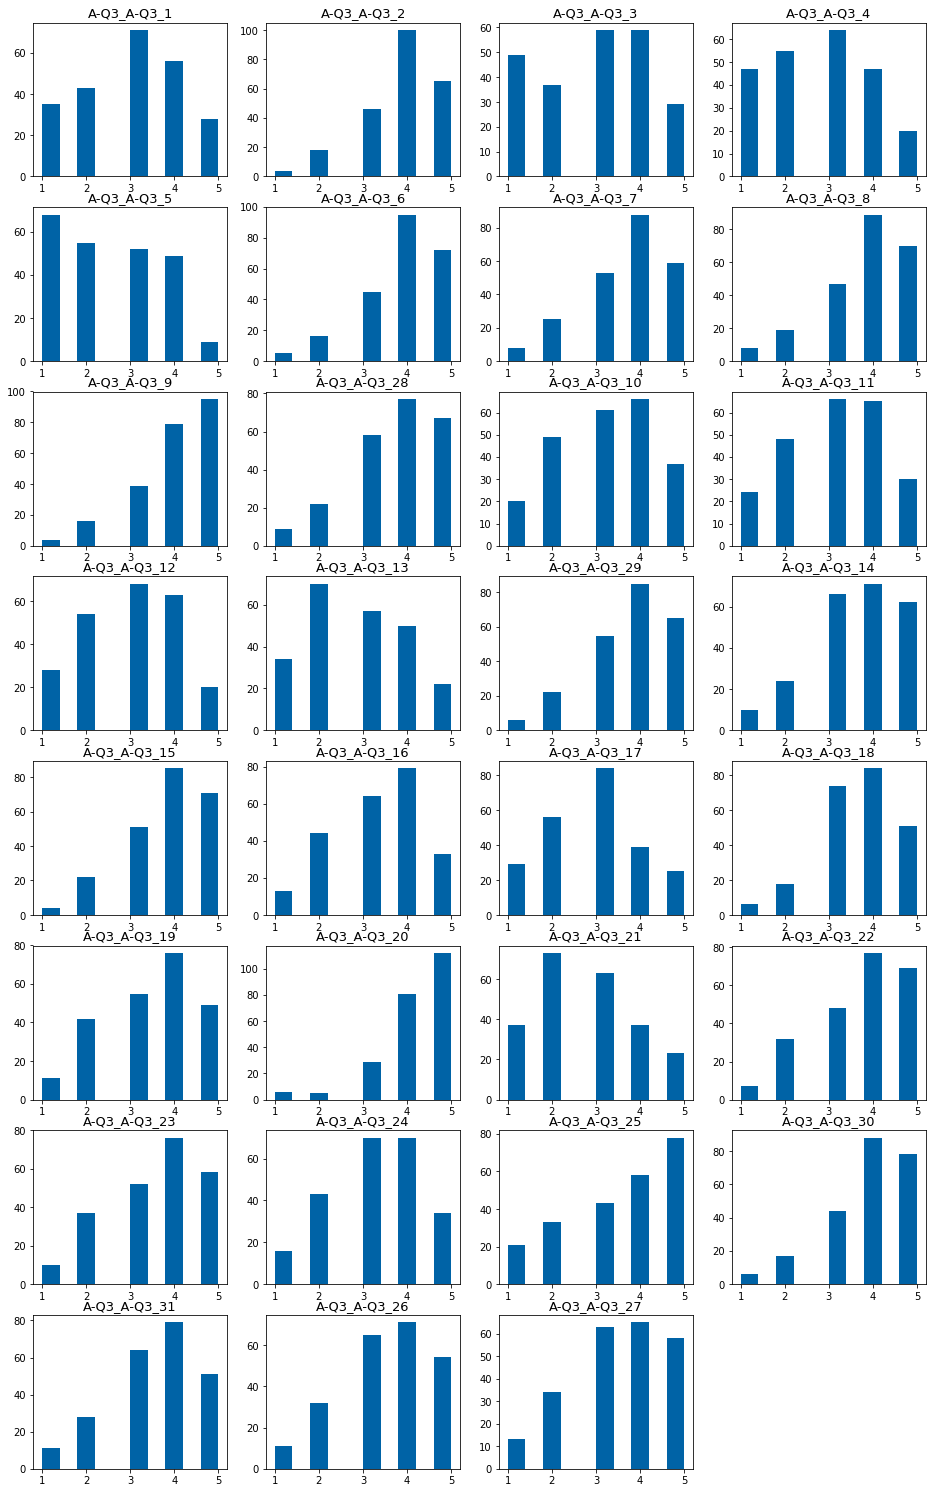

In [18]:
graf_hist(FinishedA3,Liste_A_Q3,16,30,9,4)

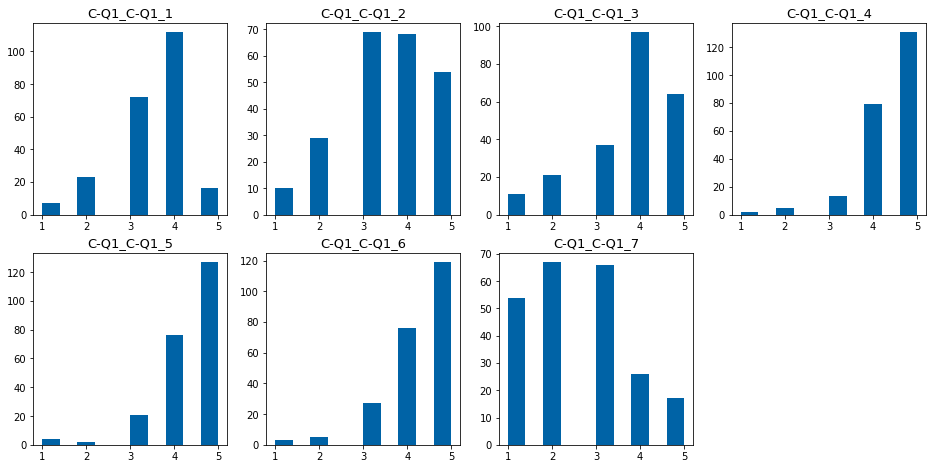

In [19]:
graf_hist(Finished,Liste_C_Q1,16,12,3,4)

### Korrelation

Funktion für Korrelationen:

In [20]:
def get_Korr_M(Dat,l):
    return pd.DataFrame(np.corrcoef(Dat[l].dropna().T),columns = l, index = l)

Korrelation für A_Q2:

In [21]:
Korr_A_Q2 = get_Korr_M(Daten,Liste_A_Q2)

Korrelation für A_Q3:

In [22]:
Korr_A_Q3 = get_Korr_M(Daten,Liste_A_Q3)

In [23]:
Korr_C_Q1 = get_Korr_M(Daten,Liste_C_Q1)

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu bekommen:

In [24]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

In [25]:
get_max_corr(Korr_A_Q3,'A-Q3_A-Q3_5', lim = 0.4)

Series([], Name: A-Q3_A-Q3_5, dtype: float64)

In [26]:
for col in Liste_A_Q3:
    print(get_max_corr(Korr_A_Q3,col,0.7))

Series([], Name: A-Q3_A-Q3_1, dtype: float64)
Series([], Name: A-Q3_A-Q3_2, dtype: float64)
Series([], Name: A-Q3_A-Q3_3, dtype: float64)
Series([], Name: A-Q3_A-Q3_4, dtype: float64)
Series([], Name: A-Q3_A-Q3_5, dtype: float64)
A-Q3_A-Q3_7    0.715613
Name: A-Q3_A-Q3_6, dtype: float64
A-Q3_A-Q3_6    0.715613
Name: A-Q3_A-Q3_7, dtype: float64
Series([], Name: A-Q3_A-Q3_8, dtype: float64)
Series([], Name: A-Q3_A-Q3_9, dtype: float64)
Series([], Name: A-Q3_A-Q3_28, dtype: float64)
Series([], Name: A-Q3_A-Q3_10, dtype: float64)
Series([], Name: A-Q3_A-Q3_11, dtype: float64)
Series([], Name: A-Q3_A-Q3_12, dtype: float64)
Series([], Name: A-Q3_A-Q3_13, dtype: float64)
Series([], Name: A-Q3_A-Q3_29, dtype: float64)
Series([], Name: A-Q3_A-Q3_14, dtype: float64)
Series([], Name: A-Q3_A-Q3_15, dtype: float64)
Series([], Name: A-Q3_A-Q3_16, dtype: float64)
Series([], Name: A-Q3_A-Q3_17, dtype: float64)
Series([], Name: A-Q3_A-Q3_18, dtype: float64)
Series([], Name: A-Q3_A-Q3_19, dtype: float64

In [27]:
get_max_corr(Korr_C_Q1,'C-Q1_C-Q1_1', lim = 0.4)

C-Q1_C-Q1_3    0.569061
C-Q1_C-Q1_4    0.529213
C-Q1_C-Q1_5    0.520650
Name: C-Q1_C-Q1_1, dtype: float64

In [28]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

C-Q1_C-Q1_3    0.569061
C-Q1_C-Q1_4    0.529213
C-Q1_C-Q1_5    0.520650
Name: C-Q1_C-Q1_1, dtype: float64
Series([], Name: C-Q1_C-Q1_2, dtype: float64)
C-Q1_C-Q1_1    0.569061
C-Q1_C-Q1_5    0.520232
Name: C-Q1_C-Q1_3, dtype: float64
C-Q1_C-Q1_1    0.529213
C-Q1_C-Q1_5    0.751436
C-Q1_C-Q1_6    0.534602
Name: C-Q1_C-Q1_4, dtype: float64
C-Q1_C-Q1_1    0.520650
C-Q1_C-Q1_3    0.520232
C-Q1_C-Q1_4    0.751436
C-Q1_C-Q1_6    0.567599
Name: C-Q1_C-Q1_5, dtype: float64
C-Q1_C-Q1_4    0.534602
C-Q1_C-Q1_5    0.567599
Name: C-Q1_C-Q1_6, dtype: float64
Series([], Name: C-Q1_C-Q1_7, dtype: float64)


### Cronbach's Alpha berechnen

In [29]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [30]:
CronbachAlpha(Daten[Liste_A_Q2])

0.36410843085506173

In [31]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [32]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [33]:
CronbachAlpha(Daten[Liste_AC_Q])

0.91197497690588114

In [34]:
CronbachAlpha(Daten[Liste_C_Q1])

0.78239150902854282

### Zeitanalyse

#### Zeitformat ändern

In [35]:
type(Daten.EndDate[0])

str

In [36]:
Daten['StartDate'] = pd.to_datetime(Daten.StartDate) #- nicht nötig, wenn Dateiformat bleibt
Daten['EndDate'] = pd.to_datetime(Daten.EndDate)

In [37]:
(Daten['EndDate'][0] - Daten['StartDate'][0]).components

Components(days=0, hours=0, minutes=5, seconds=34, milliseconds=0, microseconds=0, nanoseconds=0)

zeigt Komponenten des Datetime-Formats an

#### Beantwortungszeit berechnen

In [38]:
Daten['Diff'] = (Daten['EndDate'] - Daten['StartDate']).dt.total_seconds()

neue Spalte: "Daten.Diff", die Unterschied zwischen Anfangs- und Endzeit der Beantwortung in Sekunden angibt

In [39]:
Daten.Diff.describe()

count       234.000000
mean       5006.153846
std       37486.424886
min         334.000000
25%         648.750000
50%        1082.500000
75%        1400.250000
max      535187.000000
Name: Diff, dtype: float64

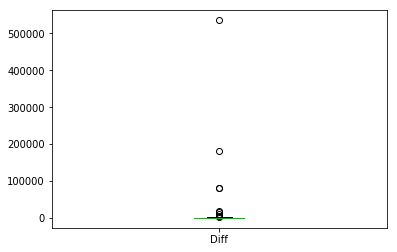

In [40]:
Daten.Diff.plot.box()

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

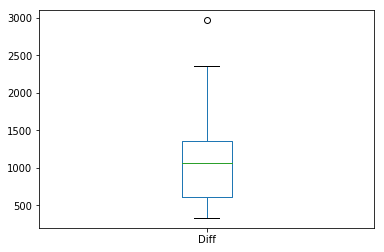

In [41]:
Daten[Daten.Diff < 4000].Diff.plot.box()

In [42]:
Daten[Daten.Diff < 4000].Diff.describe()

count     226.000000
mean     1064.880531
std       496.353511
min       334.000000
25%       619.000000
50%      1066.500000
75%      1359.750000
max      2968.000000
Name: Diff, dtype: float64

In [43]:
1065/60

17.75

Schlussfolgerung:

durchschnittliche Beantwortungszeit liegt bei ca. 18min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... verwendet wurde

### Charakteristika der Stichprobe

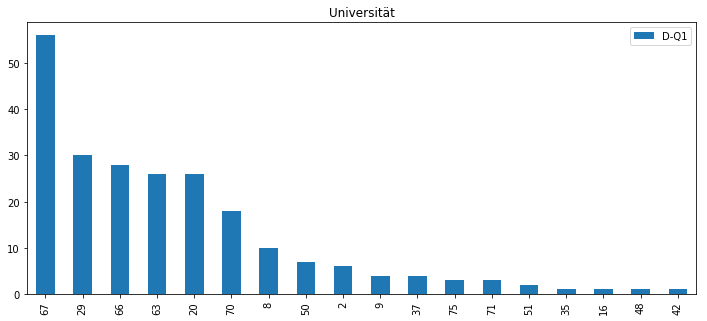

In [44]:
Finished[Finished['D-Q1'] != 0]['D-Q1'].value_counts().plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = True, title = "Universität");

(1)	Abat Oliba-CEU
(2)	Alcalá de Henares
(3)	Alfonso X El Sabio
(4)	Alicante
(5)	Almería
(6)	Antonio de Nebrija
(7)	Autónoma de Barcelona
(8)	Autónoma de Madrid
(9)	Barcelona
(10)	Burgos
(11)	Cádiz
(12)	Camilo José Cela
(13)	Cantabria
(14)	Cardenal Herrera-CEU
(15)	Carlos III
(16)	Castilla-La Mancha
(17)	Católica de Ávila
(18)	Católica de Valencia
(19)	Católica S. Antonio de Murcia
(20)	Complutense de Madrid
(21)	Córdoba
(22)	Coruña, A
(23)	Deusto
(24)	Europea de Madrid
(25)	Europea Miguel de Cervantes
(26)	Extremadura
(27)	Francisco de Vitoria
(28)	Girona
(29)	Granada
(30)	Huelva
(31)	IE Universidad
(32)	Illes Balears
(33)	Internacional de Catalunya
(34)	Internacional de La Rioja
(35)	Internacional Valenciana
(36)	Jaén
(37)	Jaume I de Castellón
(38)	La Laguna
(39)	La Rioja
(40)	León
(41)	Lleida
(42)	Málaga
(43)	Miguel Hernández de Elche
(44)	Mondragón
(45)	Murcia
(46)	Navarra
(47)	Oberta de Catalunya
(48)	Oviedo
(49)	Pablo de Olavide
(50)	País Vasco
(51)	Palmas (Las)
(52)	Politécnica de Cartagena
(53)	Politécnica de Cataluña
(54)	Politécnica de Madrid
(55)	Politécnica de Valencia
(56)	Pompeu Fabra
(57)	Pontificia Comillas
(58)	Pontificia de Salamanca
(59)	Pública de Navarra
(60)	Ramón Llull
(61)	Rey Juan Carlos
(62)	Rovira i Virgili
(63)	Salamanca
(64)	San Jorge
(65)	San Pablo-CEU
(66)	Santiago de Compostela
(67)	Sevilla
(68)	U.N.E.D.
(69)	UDIMA
(70)	Valencia (Est. General)
(71)	Valladolid
(72)	Vic
(73)	Vigo
(74)	Zaragoza
(75)	Otra

In [45]:
Finished['D-Q1'].value_counts()

67    56
29    30
66    28
63    26
20    26
70    18
8     10
50     7
2      6
9      4
37     4
75     3
0      3
71     3
51     2
35     1
16     1
48     1
42     1
Name: D-Q1, dtype: int64

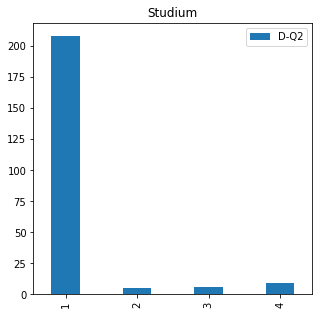

In [46]:
Finished['D-Q2'].value_counts()[[1,2,3,4]].plot(kind = 'bar', figsize = (5,5), width = 0.4, legend = True, title = "Studium");

(1)	Grado
(2)	Posgrado/Máster 
(3)	Doctorado
(4)	Otros

In [47]:
Finished['D-Q2'].value_counts()

1    208
4      9
3      6
2      5
0      2
Name: D-Q2, dtype: int64

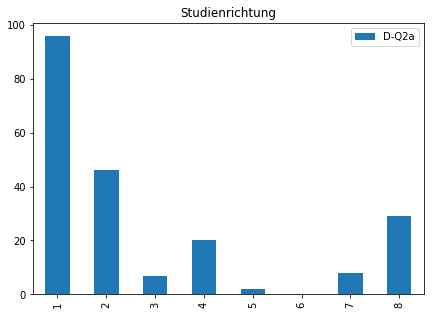

In [48]:
Finished['D-Q2a'].value_counts()[[1,2,3,4,5,6,7,8]].plot(kind='bar', figsize = (7,5), width = 0.5, legend = True, title = "Studienrichtung");

(1) Estudios Alemanes / Filología Alemana (Germanistikstudium / deutsche Philologie), (2) Otras Filologías (Anderes Philologiestudium), (3) Traducción, Alemán 1a Lengua Extranjera / B (Übersetzen und Dolmetschen, Erste Fremdsprache / Sprache B), (4) Traducción, Alemán 2a Lengua Extranjera / C (Übersetzen und Dolmetschen, Zweite Fremdsprache / Sprache C), (5) Humanidades (Humanistisches Studium), (6) Economía (Wirtschaftliches Studium), (7) Turismo (Tourismus-Studium), (8) Otra (Andere)

In [49]:
Finished['D-Q2a'].value_counts()

1    96
2    46
8    29
0    22
4    20
7     8
3     7
5     2
Name: D-Q2a, dtype: int64

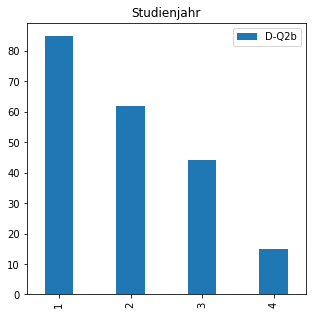

In [50]:
Finished['D-Q2b'].value_counts()[[1,2,3,4]].plot(kind='bar', figsize = (5,5), width = 0.4, legend = True, title = "Studienjahr");

In [51]:
Finished['D-Q2b'].value_counts()

1    85
2    62
3    44
0    24
4    15
Name: D-Q2b, dtype: int64

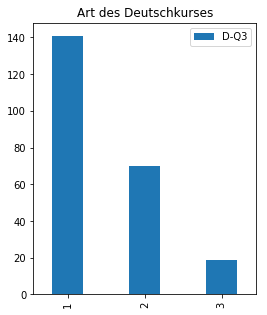

In [52]:
Finished['D-Q3'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Art des Deutschkurses");

(1) Pflichtfach, (2) Wahlfach, (3) extracurricularer Kurs

In [53]:
Finished['D-Q3'].value_counts()

1    141
2     70
3     19
Name: D-Q3, dtype: int64

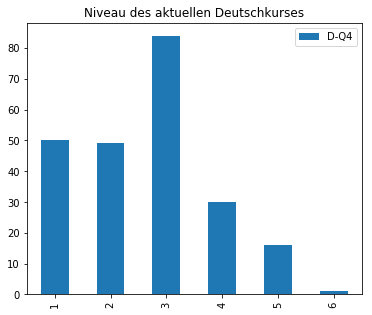

In [54]:
Finished['D-Q4'].value_counts()[[1,2,3,4,5,6]].plot(kind='bar', figsize = (6,5), width = 0.5, legend = True, title = "Niveau des aktuellen Deutschkurses");

(1)	A1, 
(2)	A2, 
(3)	B1, 
(4)	B2, 
(5)	C1,
(6)	C2 

In [55]:
Finished['D-Q4'].value_counts()

3    84
1    50
2    49
4    30
5    16
6     1
Name: D-Q4, dtype: int64

In [56]:
Finished[Finished['D-Q5'] != 0]['D-Q5'].describe()

count    222.000000
mean      22.135135
std        6.894796
min       18.000000
25%       19.000000
50%       20.000000
75%       22.000000
max       59.000000
Name: D-Q5, dtype: float64

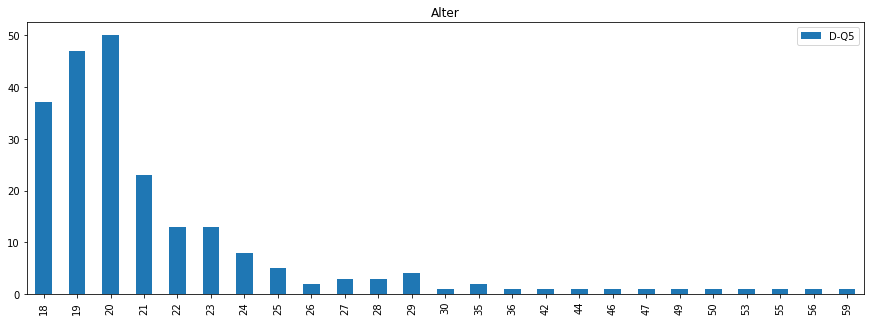

In [57]:
Finished[Finished['D-Q5'] != 0]['D-Q5'].astype(integer).value_counts().sort_index().plot(kind='bar', figsize = (15,5), legend = True, title = "Alter");

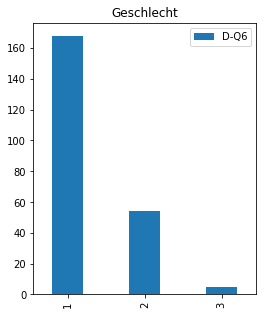

In [58]:
Finished['D-Q6'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Geschlecht");

In [59]:
Finished['D-Q6'].value_counts()

1    168
2     54
3      5
0      3
Name: D-Q6, dtype: int64

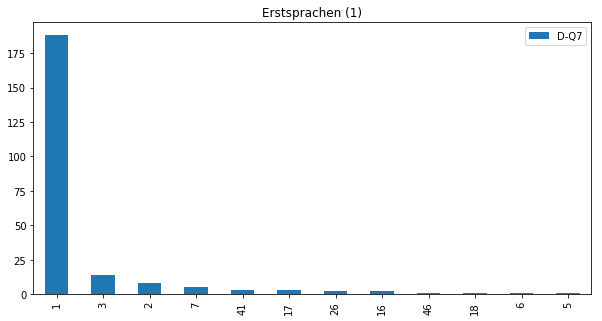

In [60]:
Finished[Finished['D-Q7'] != 0]['D-Q7'].value_counts().plot(kind='bar', figsize = (10,5), legend = True, title = "Erstsprachen (1)");

(1) 	Castellano
(2) 	Catalán (Català), Valenciano (Valencià)
(3) 	Gallego (Galego)
(4) 	Vasco (Euskara)
(5) 	Alemán (Deutsch)
(6) 	Árabe (العربية)
(7) 	Chino mandarín (中文)
(8) 	Coreano (한국어)
(9) 	Danés (Dansk)
(10) 	Francés (Français)
(11) 	Griego moderno (Ελληνικά)
(12) 	Inglés (English)
(13) 	Italiano (Italiano)
(14) 	Japonés (日本語)
(15) 	Neerlandés (Nederlands)
(16) 	Portugués (Português)
(17) 	Rumano (Română)
(18) 	Ruso (Русский)
(19) 	Sueco (Svenska)
(20) 	Griego antiguo (Aρχαία Eλληνική)
(21) 	Latín (Latina)
(22) 	Armenio (Հայերեն)
(23) 	Búlgaro (Български)
(24) 	Checo (Česky)
(25) 	Croata (Hrvatski)
(26) 	Eslovaco (Slovenčina)
(27) 	Esloveno (Slovenščina)
(28) 	Estonio (Eesti)
(29) 	Finés (Suomi)
(30) 	Galés (Cymraeg)
(31) 	Hindi (हिन्दी)
(32) 	Húngaro (Magyar)
(33) 	Irlandés (Gaeilge)
(34) 	Letón (Latviešu)
(35) 	Lituano (Lietuvių)
(36) 	Luxemburgués (Lëtzebuergesch)
(37) 	Maltés (bil-Malti)
(38) 	Moldavo (Moldoveana)
(39) 	Noruego (Norsk)
(40) 	Occitano (Occitan)
(41) 	Polaco (Polski)
(42) 	Persa (فارسی)
(43) 	Turco (Türkçe)
(44) 	Ucraniano (Українська)
(45) 	Urdu (اردو)
(46) 	Otro

In [61]:
Finished['D-Q7'].value_counts()

1     188
3      14
2       8
7       5
41      3
17      3
26      2
16      2
46      1
18      1
6       1
5       1
0       1
Name: D-Q7, dtype: int64

In [62]:
Finished['D-Q7b'].value_counts()

2    172
1     58
Name: D-Q7b, dtype: int64

In [63]:
Finished[Finished['D-Q7c'] != 0]['D-Q7c'].value_counts()

1     25
2     12
3     11
46     2
5      2
4      2
44     1
24     1
18     1
12     1
Name: D-Q7c, dtype: int64

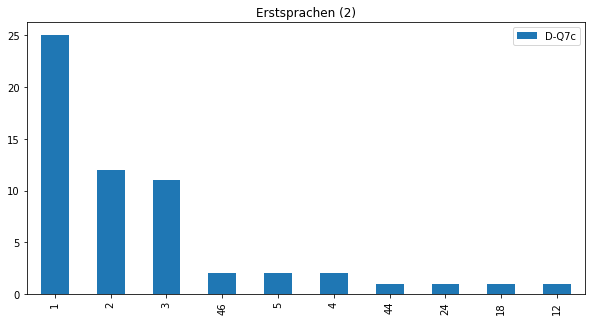

In [64]:
Finished[Finished['D-Q7c'] != 0]['D-Q7c'].value_counts().plot(kind='bar', figsize = (10,5), legend = True, title = "Erstsprachen (2)");

In [65]:
Finished[Finished['D-Q7e'] != 0]['D-Q7e'].value_counts()

2    57
1     1
Name: D-Q7e, dtype: int64

In [66]:
Finished[Finished['D-Q7f'] != 0]['D-Q7f'].value_counts()

46    1
Name: D-Q7f, dtype: int64

Otro = Guaraní

In [117]:
Sprachen = Finished[['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']]

In [118]:
DF_Spr = Sprachen.apply(pd.value_counts).fillna(0).astype(integer)

In [119]:
ix_sorted = list(DF_Spr[1:].sum(axis = 1).sort_values(ascending=False).index)

In [120]:
All = []
for i in DF_Spr.index:
    All.append((DF_Spr.loc[i]).sum())

In [121]:
DF_Spr['All'] = All

In [122]:
DF_Spr[1:]

,D-Q8_1,D-Q8_2,D-Q8_3,D-Q8_4,D-Q8_5,D-Q8_6,D-Q8_7,All
1,5,6,5,4,0,1,0,21
2,4,4,4,3,2,0,0,17
3,1,2,0,1,1,0,1,6
4,6,3,0,1,1,1,0,12
5,10,39,68,36,45,15,0,213
6,0,0,3,1,1,0,0,5
7,2,0,1,1,2,1,0,7
8,0,0,0,0,1,0,0,1
9,0,0,0,0,1,0,1,2
10,8,106,23,9,5,2,0,153


In [123]:
cols = ['D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

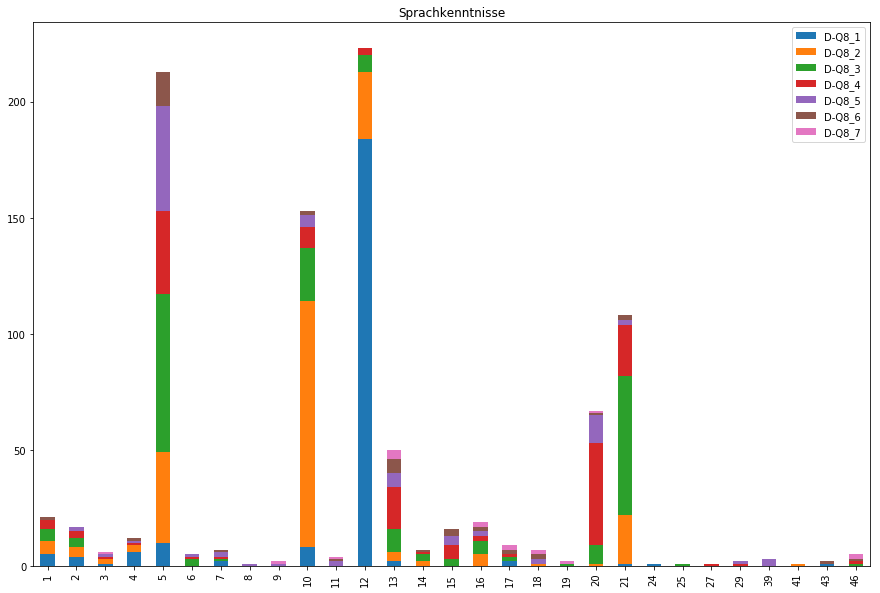

In [124]:
DF_Spr[cols][1:].plot(kind='bar', figsize = (15,10), stacked = True, legend = True, title = "Sprachkenntnisse");

In [125]:
DF_Spr.loc[ix_sorted[:10]]

,D-Q8_1,D-Q8_2,D-Q8_3,D-Q8_4,D-Q8_5,D-Q8_6,D-Q8_7,All
12,184,29,7,3,0,0,0,223
5,10,39,68,36,45,15,0,213
10,8,106,23,9,5,2,0,153
21,1,21,60,22,2,2,0,108
20,0,1,8,44,12,1,1,67
13,2,4,10,18,6,6,4,50
1,5,6,5,4,0,1,0,21
16,0,5,6,2,2,2,2,19
2,4,4,4,3,2,0,0,17
15,0,0,3,6,4,3,0,16


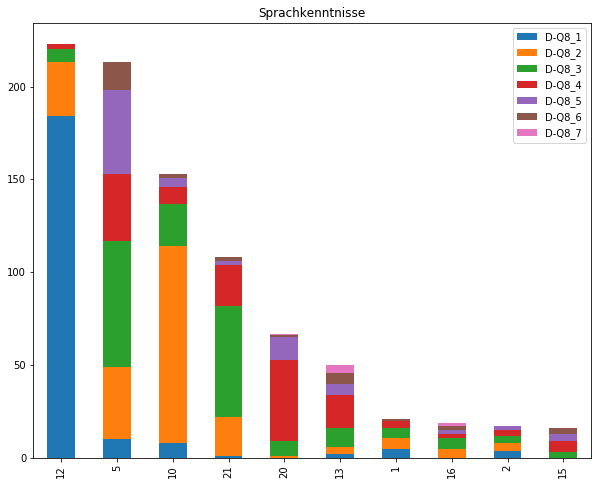

In [126]:
DF_Spr[cols].loc[ix_sorted[:10]].plot(kind='bar', figsize = (10,8), stacked = True, legend = True, title = "Sprachkenntnisse");